In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
X = X.reshape(100)

In [4]:
df = pd.DataFrame()

In [5]:
df['X'] = X.reshape(100)
df['y'] = y

<Axes: >

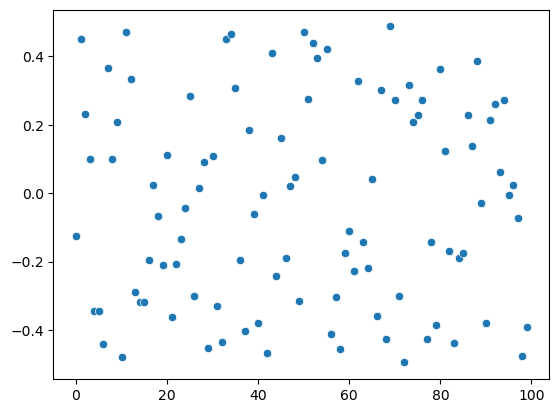

In [26]:
sns.scatterplot(X)

<Axes: >

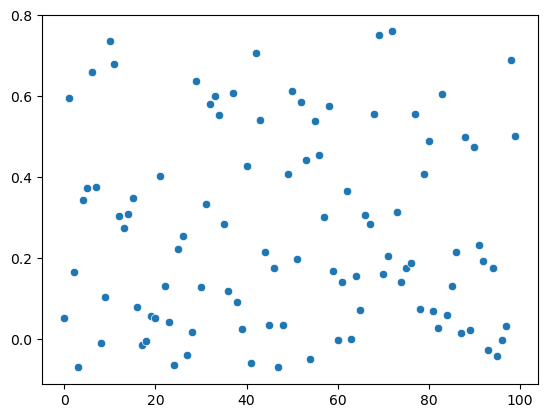

In [27]:
sns.scatterplot(y)

In [6]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


<Axes: xlabel='X', ylabel='y'>

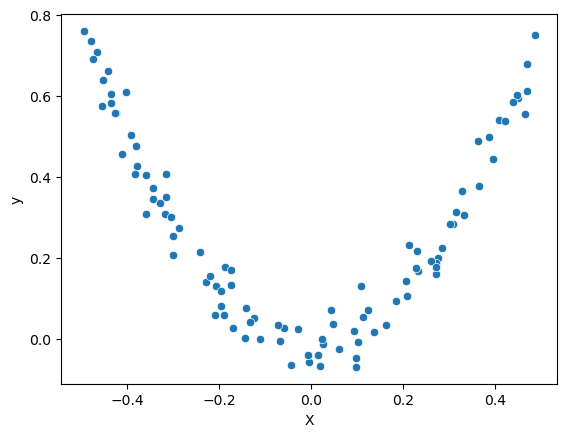

In [7]:
sns.scatterplot(data=df,x=df["X"],y=df["y"])

In [8]:
df['pred1'] = df['y'].mean()

In [9]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [10]:
df['res1'] = df['y'] - df['pred1']

In [11]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


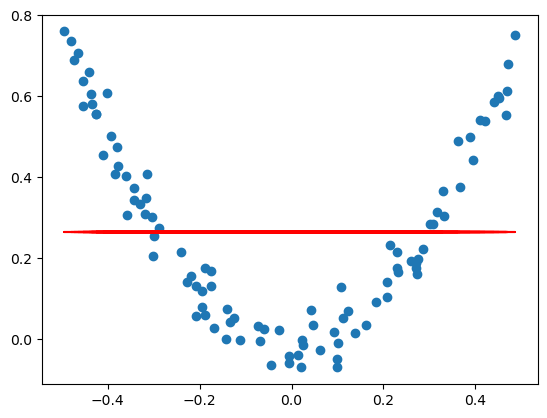

In [12]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [13]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [15]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

[Text(0.4090909090909091, 0.9166666666666666, 'x[0] <= -0.36\nsquared_error = 0.056\nsamples = 100\nvalue = 0.0'),
 Text(0.18181818181818182, 0.75, 'x[0] <= -0.43\nsquared_error = 0.012\nsamples = 18\nvalue = 0.309'),
 Text(0.09090909090909091, 0.5833333333333334, 'squared_error = 0.004\nsamples = 9\nvalue = 0.395'),
 Text(0.2727272727272727, 0.5833333333333334, 'squared_error = 0.005\nsamples = 9\nvalue = 0.222'),
 Text(0.6363636363636364, 0.75, 'x[0] <= 0.322\nsquared_error = 0.04\nsamples = 82\nvalue = -0.068'),
 Text(0.45454545454545453, 0.5833333333333334, 'x[0] <= -0.235\nsquared_error = 0.016\nsamples = 67\nvalue = -0.142'),
 Text(0.36363636363636365, 0.4166666666666667, 'squared_error = 0.003\nsamples = 12\nvalue = 0.041'),
 Text(0.5454545454545454, 0.4166666666666667, 'x[0] <= 0.211\nsquared_error = 0.009\nsamples = 55\nvalue = -0.182'),
 Text(0.45454545454545453, 0.25, 'x[0] <= -0.172\nsquared_error = 0.005\nsamples = 42\nvalue = -0.223'),
 Text(0.36363636363636365, 0.0833333

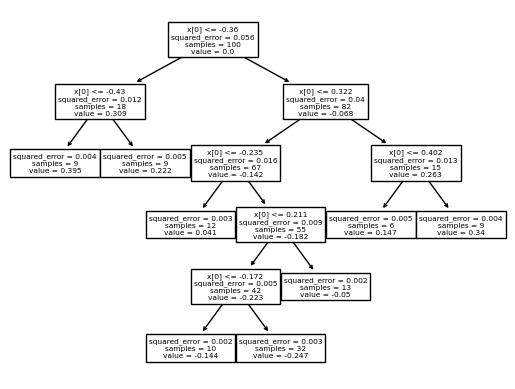

In [16]:
from sklearn.tree import plot_tree
plot_tree(tree1)

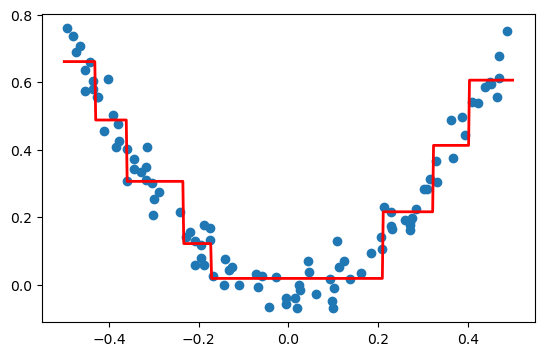

In [22]:
# generating X_test
X_test = np.linspace(-0.5, 0.5, 500)
     

y_pred = 0.265458 + tree1.predict(X_test.reshape(500, 1))
     

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

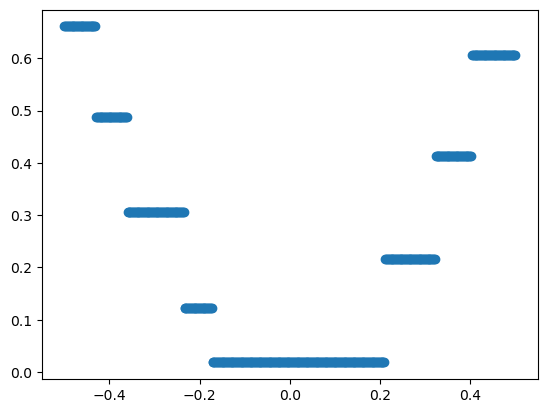

In [24]:
plt.scatter(X_test,y_pred)

<Axes: >

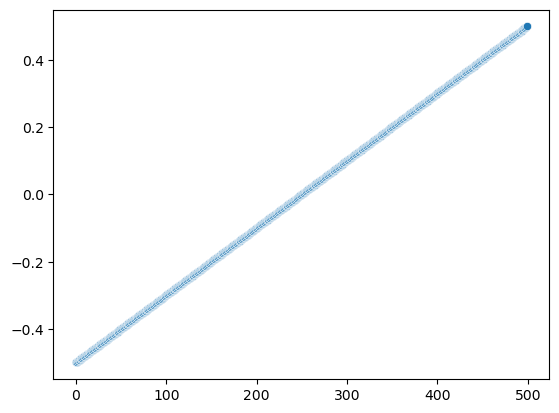

In [25]:
sns.scatterplot(X_test)

In [28]:
y_pred2 = 0.265458 + tree1.predict(df.X.values.reshape(100, 1))

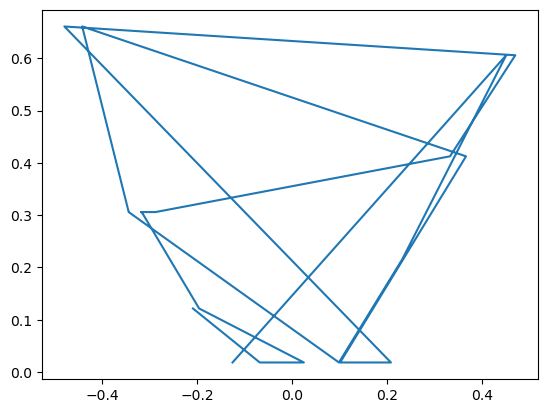

In [32]:
plt.plot(df.X.values[:20],y_pred2[0:20])

# Simply we can see it is overfitting on the data

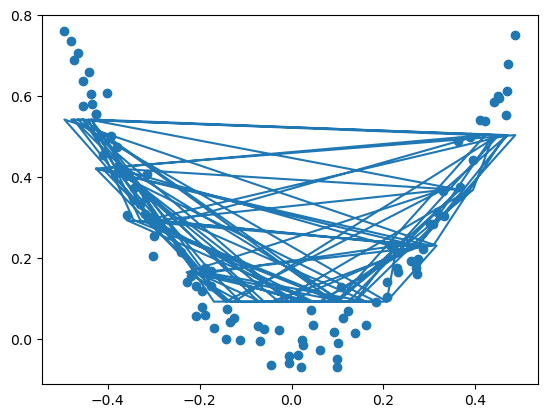

In [40]:
y_pred3 = 0.265458 + 0.7*tree1.predict(df.X.values.reshape(100, 1))
plt.plot(df.X.values,y_pred3)
plt.scatter(df["X"],df['y'])

In [41]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [42]:
df['res2'] = df['y'] - df['pred2']

In [43]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [44]:
y_pred4 = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

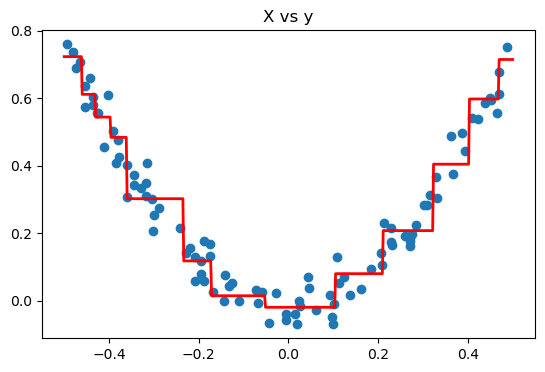

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred4, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')